# Detection of onset in data

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

One of the simplest methods to automatically detect or identify the change or occurrence of a particular event in the data, for example, its beginning and ending, or simply the data onset, is based on amplitude threshold, where the signal is considered to be 'on' when it is above a certain threshold. This threshold can be proportional to the amplitude of the baseline (the part of the data that we know there is no real signal, only noise).  

For instance, a threshold equals to two or three times the standard deviation of the baseline is a common procedure employed in the analysis of electromyographic data. Other way to set the threshold would be as a percentage value of the maximum or peak of the data. For instance, in movement analysis it's common to define the onset period as the signal above 5% of the peak velocity of the investigated movement. 

The function `detect_onset.py` (code at the end) implements such onset detection based on the amplitude-threshold method with a parameter to specify a minimum number of samples above threshold to detect as onset, other parameter to specify the minimum number of samples (continuous or not) below threshold that will be ignored in the detection of data greater or equal to threshold (to avoid the detection of spikes or transients in the data), and a second threshold parameter to specify the minimum amplitude that a minimum number of samples should have (to avoid the detection of baseline fluctuations that are above the first threshold but are not actual signals).  

`detect_onset.py` signature is:
```python
inds = detect_onset(x, threshold=0, n_above=1, n_below=0,
                    threshold2=None, n_above2=1, show=False, ax=None)
```
Let's see how `detect_onset.py` works; first let's import the necessary Python libraries and configure the environment:  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(1, r'./../functions')  # add to pythonpath
from detect_onset import detect_onset

Let's run the function examples:

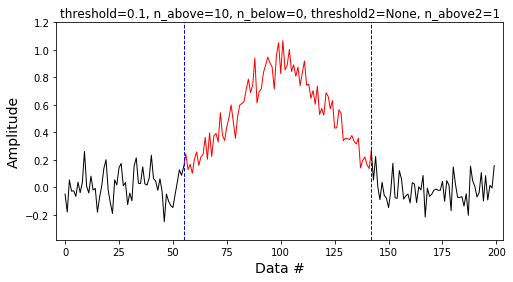

array([[ 55, 142]], dtype=int64)

In [2]:
    >>> x = np.random.randn(200)/10
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> detect_onset(x, np.std(x[:50]), n_above=10, n_below=0, show=True)

Add some noise:

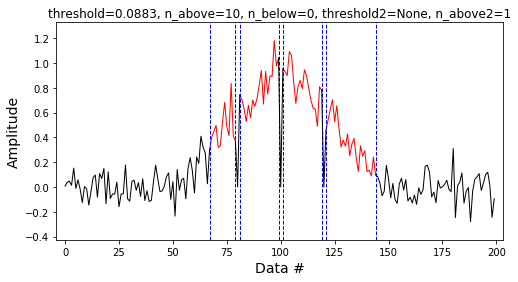

array([[ 67,  79],
       [ 81,  99],
       [101, 119],
       [121, 144]], dtype=int64)

In [3]:
    >>> x = np.random.randn(200)/10
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> x[80:140:20] = 0
    >>> detect_onset(x, np.std(x[:50]), n_above=10, n_below=0, show=True)

We will use the `n_below` parameter to not detect the noise from former example as onsets:

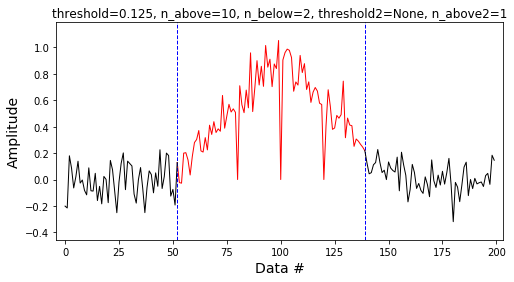

array([[ 52, 139]], dtype=int64)

In [4]:
    >>> x = np.random.randn(200)/10
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> x[80:140:20] = 0
    >>> detect_onset(x, np.std(x[:50]), n_above=10, n_below=2, show=True)

`detect_onset` works with missing values (NaNs):

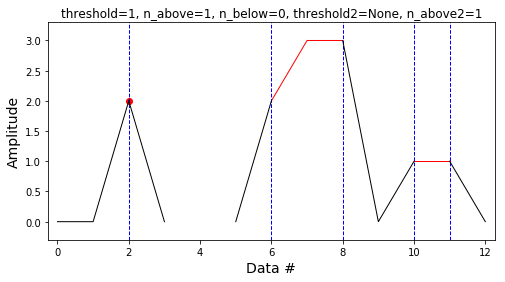

array([[ 2,  2],
       [ 6,  8],
       [10, 11]], dtype=int64)

In [5]:
    >>> x = [0, 0, 2, 0, np.nan, 0, 2, 3, 3, 0, 1, 1, 0]
    >>> detect_onset(x, threshold=1, n_above=1, n_below=0, show=True)

Consider the case where there is a false onset because some data in the baseline are greater than the `threshold`:

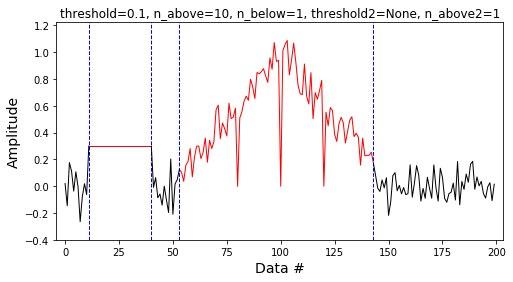

array([[ 11,  40],
       [ 53, 143]], dtype=int64)

In [6]:
    >>> x = np.random.randn(200)/10
    >>> x[11:41] = np.ones(30)*.3
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> x[80:140:20] = 0
    >>> detect_onset(x, .1, n_above=10, n_below=1, show=True)

We can't increase the value of the `threshold` because this would delay the detection of the actual onset:

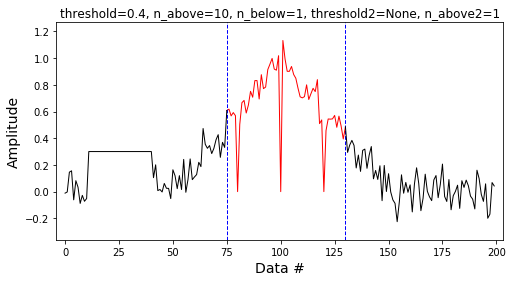

array([[ 75, 130]], dtype=int64)

In [7]:
    >>> x = np.random.randn(200)/10
    >>> x[11:41] = np.ones(30)*.3
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> x[80:140:20] = 0
    >>> detect_onset(x, .4, n_above=10, n_below=1, show=True)  

For this situation we can use the second threshold parameter, `threshold2` with corresponding `n_above2` parameter:

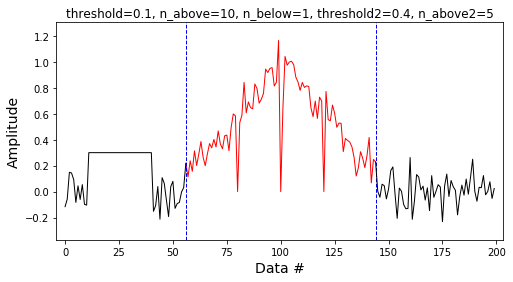

array([[ 56, 144]], dtype=int64)

In [8]:
    >>> x = np.random.randn(200)/10
    >>> x[11:41] = np.ones(30)*.3
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> x[80:140:20] = 0
    >>> detect_onset(x, .1, n_above=10, n_below=1,
                     threshold2=.4, n_above2=5, show=True)

#### Performance

The performance of the `detect_onset` function varies with the data and parameters.  
Here is a simple test of the `detect_onset.py` performance:

In [9]:
x = np.random.randn(10000)
print('Detection of onset (data size= %d):' %x.size)
%timeit detect_onset(x, threshold=0, n_above=10, n_below=1, threshold2=.5, n_above2=5, show=False)

Detection of onset (data size= 10000):
485 µs ± 3.48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Function `detect_onset.py`

In [ ]:
# %load ./../functions/detect_onset.py
"""Detects onset in data based on amplitude threshold."""

import numpy as np

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = "1.0.6"
__license__ = "MIT"


def detect_onset(x, threshold=0, n_above=1, n_below=0,
                 threshold2=None, n_above2=1, show=False, ax=None):
    """Detects onset in data based on amplitude threshold.

    Parameters
    ----------
    x : 1D array_like
        data.
    threshold : number, optional (default = 0)
        minimum amplitude of `x` to detect.
    n_above : number, optional (default = 1)
        minimum number of continuous samples >= `threshold`
        to detect (but see the parameter `n_below`).
    n_below : number, optional (default = 0)
        minimum number of continuous samples below `threshold` that
        will be ignored in the detection of `x` >= `threshold`.
    threshold2 : number or None, optional (default = None)
        minimum amplitude of `n_above2` values in `x` to detect.
    n_above2 : number, optional (default = 1)
        minimum number of samples >= `threshold2` to detect.
    show  : bool, optional (default = False)
        True (1) plots data in matplotlib figure, False (0) don't plot.
    ax : a matplotlib.axes.Axes instance, optional (default = None).

    Returns
    -------
    inds : 1D array_like [indi, indf]
        initial and final indeces of the onset events.

    Notes
    -----
    You might have to tune the parameters according to the signal-to-noise
    characteristic of the data.

    See this IPython Notebook [1]_.

    References
    ----------
    .. [1] http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/DetectOnset.ipynb

    Examples
    --------
    >>> from detect_onset import detect_onset
    >>> x = np.random.randn(200)/10
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> detect_onset(x, np.std(x[:50]), n_above=10, n_below=0, show=True)

    >>> x = np.random.randn(200)/10
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> x[80:140:20] = 0
    >>> detect_onset(x, np.std(x[:50]), n_above=10, n_below=0, show=True)

    >>> x = np.random.randn(200)/10
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> x[80:140:20] = 0
    >>> detect_onset(x, np.std(x[:50]), n_above=10, n_below=2, show=True)

    >>> x = [0, 0, 2, 0, np.nan, 0, 2, 3, 3, 0, 1, 1, 0]
    >>> detect_onset(x, threshold=1, n_above=1, n_below=0, show=True)

    >>> x = np.random.randn(200)/10
    >>> x[11:41] = np.ones(30)*.3
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> x[80:140:20] = 0
    >>> detect_onset(x, .2, n_above=10, n_below=1, show=True)

    >>> x = np.random.randn(200)/10
    >>> x[11:41] = np.ones(30)*.3
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> x[80:140:20] = 0
    >>> detect_onset(x, .4, n_above=10, n_below=1, show=True)

    >>> x = np.random.randn(200)/10
    >>> x[11:41] = np.ones(30)*.3
    >>> x[51:151] += np.hstack((np.linspace(0,1,50), np.linspace(1,0,50)))
    >>> x[80:140:20] = 0
    >>> detect_onset(x, .2, n_above=10, n_below=1,
                     threshold2=.4, n_above2=5, show=True)

    Version history
    ---------------
    '1.0.6':
        - Deleted 'from future import'
        + Added parameters `threshold2` and `n_above2`
    """

    x = np.atleast_1d(x).astype('float64')
    # deal with NaN's (by definition, NaN's are not greater than threshold)
    x[np.isnan(x)] = -np.inf
    # indices of data greater than or equal to threshold
    inds = np.nonzero(x >= threshold)[0]
    if inds.size:
        # initial and final indexes of almost continuous data
        inds = np.vstack((inds[np.diff(np.hstack((-np.inf, inds))) > n_below+1], \
                          inds[np.diff(np.hstack((inds, np.inf))) > n_below+1])).T
        # indexes of almost continuous data longer than or equal to n_above
        inds = inds[inds[:, 1]-inds[:, 0] >= n_above-1, :]
        # minimum amplitude of n_above2 values in x to detect
        if threshold2 is not None and inds.size:
            idel = np.ones(inds.shape[0], dtype=bool)
            for i in range(inds.shape[0]):
                if np.count_nonzero(x[inds[i, 0]: inds[i, 1]+1] >= threshold2) < n_above2:
                    idel[i] = False
            inds = inds[idel, :]
    if not inds.size:
        inds = np.array([])  # standardize inds shape for output
    if show and x.size > 1:  # don't waste my time ploting one datum
        _plot(x, threshold, n_above, n_below, threshold2, n_above2, inds, ax)

    return inds


def _plot(x, threshold, n_above, n_below, threshold2, n_above2, inds, ax):
    """Plot results of the detect_onset function, see its help."""
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print('matplotlib is not available.')
    else:
        if ax is None:
            _, ax = plt.subplots(1, 1, figsize=(8, 4))

        if inds.size:
            for (indi, indf) in inds:
                if indi == indf:
                    ax.plot(indf, x[indf], 'ro', mec='r', ms=6)
                else:
                    ax.plot(range(indi, indf+1), x[indi:indf+1], 'r', lw=1)
                    ax.axvline(x=indi, color='b', lw=1, ls='--')
                ax.axvline(x=indf, color='b', lw=1, ls='--')
            inds = np.vstack((np.hstack((0, inds[:, 1])),
                              np.hstack((inds[:, 0], x.size-1)))).T
            for (indi, indf) in inds:
                ax.plot(range(indi, indf+1), x[indi:indf+1], 'k', lw=1)
        else:
            ax.plot(x, 'k', lw=1)
            ax.axhline(y=threshold, color='r', lw=1, ls='-')

        ax.set_xlim(-.02*x.size, x.size*1.02-1)
        ymin, ymax = x[np.isfinite(x)].min(), x[np.isfinite(x)].max()
        yrange = ymax - ymin if ymax > ymin else 1
        ax.set_ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
        ax.set_xlabel('Data #', fontsize=14)
        ax.set_ylabel('Amplitude', fontsize=14)
        if threshold2 is not None:
            text = 'threshold=%.3g, n_above=%d, n_below=%d, threshold2=%.3g, n_above2=%d'
        else:
            text = 'threshold=%.3g, n_above=%d, n_below=%d, threshold2=%r, n_above2=%d'            
        ax.set_title(text % (threshold, n_above, n_below, threshold2, n_above2))
        # plt.grid()
        plt.show()
